In [0]:
from fastai.vision import *


In [0]:
folder = 'black'
file = 'urls_black.csv'

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

1+4;2+4;3+4 cell run 

In [13]:
path.ls()

[PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/urls_balck.csv'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_grizzly.csv')]

prepaer data ：urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));   with ctrl+shift+J

In [0]:
classes = ['teddys','grizzly','black']

dest

In [31]:
dest

PosixPath('data/bears/teddys')

In [32]:
file

'urls_teddys.csv'

In [20]:
download_images(path/file, dest, max_pics=200)

In [28]:
download_images(path/file, dest, max_pics=200) #befor run ,run black cycle

Error https://www.zooportraits.com/wp-content/uploads/2018/05/American-Black-Bear-Ursus-Thibetanus.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


run 1

In [33]:
download_images(path/file, dest, max_pics=200) #befor run ,run teddys cycle

Error https://www.offercart.in/wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg HTTPSConnectionPool(host='www.offercart.in', port=443): Max retries exceeded with url: /wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f3968390160>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error https://www.sendah.com/988-large_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-large_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://images.harrods.com/product/givenchy/logo-teddy-bear_000000006184567001_f.jpg?dwn=767px:873px HTTPSConnec

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,no_check=True).normalize(imagenet_stats)

In [45]:

data.classes

['black', 'grizzly', 'teddys']

In [46]:

data.show_batch(rows=3, figsize=(7,8))             #???????????????????????

OSError: ignored

In [37]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 473, 118)

In [39]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 22478752.99it/s]


In [40]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


OSError: ignored

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:

learn.save('stage-2')

In [0]:

learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

### **Cleaning Up**

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

In [0]:
learn.export()

In [0]:

defaults.device = torch.device('cpu')

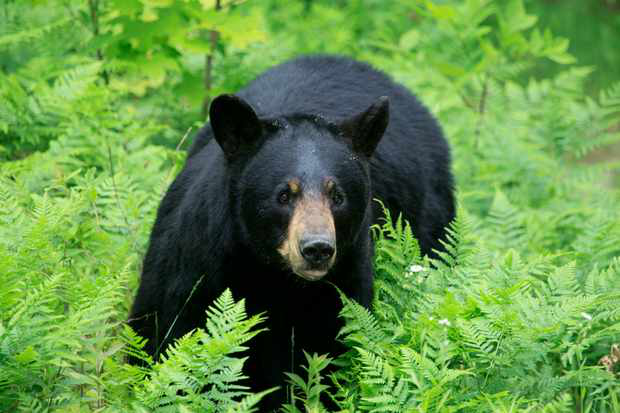

In [47]:
img = open_image(path/'black'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class